# 영문 Word Cloud
- 미국 독일 선언문

In [1]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 11.7 MB/s eta 0:00:01


In [4]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/tj/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /Users/tj/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/tj/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/tj/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/tj/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/tj/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nl

True

### text를 불러서 word분류

In [14]:
content = open("../Data/Independence.txt").read()
content

'When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature\'s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness. (Note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of Happiness" but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today). \nThat to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed. That whenever

In [15]:
# 불필요한 심벌 없애기
# cleaned_content = content.replace("!","").replace(',','')
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]','',content) # 문장단위로 끊기
cleaned_content

'When in the Course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the Laws of Nature and of Natures God entitle them a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be selfevident that all men are created equal that they are endowed by their Creator with certain unalienable Rights that among these are Life Liberty and the pursuit of Happiness. Note the original handwritten text ended on the phrasethe pursuit of property rather than the pursuit of Happiness but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today. \nThat to secure these rights Governments are instituted among Men deriving their just powers from the consent of the governed. That whenever any Form of Governme

In [16]:
# 대문자를 소문자로 변환
cleaned_content =cleaned_content.lower()
cleaned_content

'when in the course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the laws of nature and of natures god entitle them a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nwe hold these truths to be selfevident that all men are created equal that they are endowed by their creator with certain unalienable rights that among these are life liberty and the pursuit of happiness. note the original handwritten text ended on the phrasethe pursuit of property rather than the pursuit of happiness but the phrase was changed in subsequent copies in part because it was broader. the latter phrase is used today. \nthat to secure these rights governments are instituted among men deriving their just powers from the consent of the governed. that whenever any form of governme

In [17]:
# 문장에서 워드를 토큰으로 쪼갠다.
word_tokens =nltk.word_tokenize(cleaned_content)
print(word_tokens)

['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary', 'for', 'one', 'people', 'to', 'dissolve', 'the', 'political', 'bands', 'which', 'have', 'connected', 'them', 'with', 'another', 'and', 'to', 'assume', 'among', 'the', 'powers', 'of', 'the', 'earth', 'the', 'separate', 'and', 'equal', 'station', 'to', 'which', 'the', 'laws', 'of', 'nature', 'and', 'of', 'natures', 'god', 'entitle', 'them', 'a', 'decent', 'respect', 'to', 'the', 'opinions', 'of', 'mankind', 'requires', 'that', 'they', 'should', 'declare', 'the', 'causes', 'which', 'impel', 'them', 'to', 'the', 'separation', '.', 'we', 'hold', 'these', 'truths', 'to', 'be', 'selfevident', 'that', 'all', 'men', 'are', 'created', 'equal', 'that', 'they', 'are', 'endowed', 'by', 'their', 'creator', 'with', 'certain', 'unalienable', 'rights', 'that', 'among', 'these', 'are', 'life', 'liberty', 'and', 'the', 'pursuit', 'of', 'happiness', '.', 'note', 'the', 'original', 'handwritten', 'text', 'ended', 'on', '

In [18]:
# 품사분리
token_pos = nltk.pos_tag(word_tokens)
print(token_pos)

[('when', 'WRB'), ('in', 'IN'), ('the', 'DT'), ('course', 'NN'), ('of', 'IN'), ('human', 'JJ'), ('events', 'NNS'), ('it', 'PRP'), ('becomes', 'VBZ'), ('necessary', 'JJ'), ('for', 'IN'), ('one', 'CD'), ('people', 'NNS'), ('to', 'TO'), ('dissolve', 'VB'), ('the', 'DT'), ('political', 'JJ'), ('bands', 'NNS'), ('which', 'WDT'), ('have', 'VBP'), ('connected', 'VBN'), ('them', 'PRP'), ('with', 'IN'), ('another', 'DT'), ('and', 'CC'), ('to', 'TO'), ('assume', 'VB'), ('among', 'IN'), ('the', 'DT'), ('powers', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('earth', 'NN'), ('the', 'DT'), ('separate', 'JJ'), ('and', 'CC'), ('equal', 'JJ'), ('station', 'NN'), ('to', 'TO'), ('which', 'WDT'), ('the', 'DT'), ('laws', 'NNS'), ('of', 'IN'), ('nature', 'NN'), ('and', 'CC'), ('of', 'IN'), ('natures', 'NNS'), ('god', 'VBP'), ('entitle', 'VB'), ('them', 'PRP'), ('a', 'DT'), ('decent', 'JJ'), ('respect', 'NN'), ('to', 'TO'), ('the', 'DT'), ('opinions', 'NNS'), ('of', 'IN'), ('mankind', 'NN'), ('requires', 'VBZ'), ('

In [19]:
# 명사만 추출하기
NN_words =[]
for word, pos in token_pos:
    if 'NN' in pos :
        NN_words.append(word)

print(NN_words)

['course', 'events', 'people', 'bands', 'powers', 'earth', 'station', 'laws', 'nature', 'natures', 'respect', 'opinions', 'mankind', 'causes', 'separation', 'truths', 'men', 'creator', 'rights', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copies', 'part', 'phrase', 'today', 'rights', 'governments', 'men', 'powers', 'consent', 'form', 'government', 'becomes', 'ends', 'right', 'people', 'government', 'foundation', 'principles', 'powers', 'form', 'effect', 'safety', 'happiness', 'prudence', 'governments', 'light', 'causes', 'experience', 'mankind', 'evils', 'forms', 'train', 'abuses', 'usurpations', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guards', 'security', 'sufferance', 'colonies', 'necessity', 'systems', 'government', 'history', 'king', 'britain', 'history', 'injuries', 'usurpations', 'establishment', 'tyranny', 'states', 'let', 'world', 'assent', 'laws', 'good', 'governors', 'laws', 'importan

In [20]:
# 원형으로 복원
wlem = nltk.WordNetLemmatizer()
lenmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lenmatized_words.append(new_word)

print(lenmatized_words)

['course', 'event', 'people', 'band', 'power', 'earth', 'station', 'law', 'nature', 'nature', 'respect', 'opinion', 'mankind', 'cause', 'separation', 'truth', 'men', 'creator', 'right', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copy', 'part', 'phrase', 'today', 'right', 'government', 'men', 'power', 'consent', 'form', 'government', 'becomes', 'end', 'right', 'people', 'government', 'foundation', 'principle', 'power', 'form', 'effect', 'safety', 'happiness', 'prudence', 'government', 'light', 'cause', 'experience', 'mankind', 'evil', 'form', 'train', 'abuse', 'usurpation', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guard', 'security', 'sufferance', 'colony', 'necessity', 'system', 'government', 'history', 'king', 'britain', 'history', 'injury', 'usurpation', 'establishment', 'tyranny', 'state', 'let', 'world', 'assent', 'law', 'good', 'governor', 'law', 'importance', 'operation', 'assent', 'law',

In [22]:
# 불용어 제거 (워드클라우드에서 보이면 그때 제거하기 시작한다.)
stopwords_list = stopwords.words('english')
unique_NN_words = set(lenmatized_words) # 중복된것을 한번에 제거하기
final_NN_words = lenmatized_words   

for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

print(final_NN_words)

In [27]:
# 원하는 단어를 제거
customized_stopwords = ['be','today','yesterday',"it's","don't",'others']
# print(c.most_common(20))의 값을 보고 'others를 추가시켜준다.
unique_NN_words1 =set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words:
            final_NN_words.remove(word)

In [28]:
# 빈도 분석  여기까지 정리하는것이 중요!!! 워드클라우드가 중요한게 아니다~!!!!!!!
from collections import Counter

c= Counter(final_NN_words)
print(c)

Counter({'people': 10, 'law': 9, 'government': 9, 'state': 9, 'power': 8, 'right': 6, 'time': 6, 'form': 4, 'colony': 4, 'assent': 4, 'legislature': 4, 'mankind': 3, 'life': 3, 'pursuit': 3, 'happiness': 3, 'consent': 3, 'usurpation': 3, 'world': 3, 'justice': 3, 'peace': 3, 'act': 3, 'sea': 3, 'war': 3, 'nature': 2, 'cause': 2, 'separation': 2, 'men': 2, 'phrase': 2, 'part': 2, 'absolute': 2, 'necessity': 2, 'system': 2, 'history': 2, 'britain': 2, 'injury': 2, 'tyrant': 2, 'body': 2, 'purpose': 2, 'invasion': 2, 'condition': 2, 'judge': 2, 'office': 2, 'army': 2, 'jurisdiction': 2, 'trial': 2, 'inhabitant': 2, 'case': 2, 'rule': 2, 'protection': 2, 'circumstance': 2, 'age': 2, 'friend': 2, 'brother': 2, 'connection': 2, 'course': 1, 'event': 1, 'band': 1, 'earth': 1, 'station': 1, 'respect': 1, 'opinion': 1, 'truth': 1, 'creator': 1, 'liberty': 1, 'text': 1, 'property': 1, 'copy': 1, 'becomes': 1, 'end': 1, 'foundation': 1, 'principle': 1, 'effect': 1, 'safety': 1, 'prudence': 1, 'li

In [29]:
print(c.most_common(20))

[('people', 10), ('law', 9), ('government', 9), ('state', 9), ('power', 8), ('right', 6), ('time', 6), ('form', 4), ('colony', 4), ('assent', 4), ('legislature', 4), ('mankind', 3), ('life', 3), ('pursuit', 3), ('happiness', 3), ('consent', 3), ('usurpation', 3), ('world', 3), ('justice', 3), ('peace', 3)]


In [30]:
# 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text + ' ' + word

noun_text

' course event people band power earth station law nature nature respect opinion mankind cause separation truth men creator right life liberty pursuit happiness text pursuit property pursuit happiness phrase copy part phrase right government men power consent form government becomes end right people government foundation principle power form effect safety happiness prudence government light cause experience mankind evil form train abuse usurpation object design absolute despotism duty government guard security sufferance colony necessity system government history king britain history injury usurpation establishment tyranny state let world assent law good governor law importance operation assent law accommodation district people people right representation legislature inestimable tyrant body place depository record purpose compliance measure house invasion right people time dissolution power annihilation people exercise state time danger invasion convulsion population state purpose law 

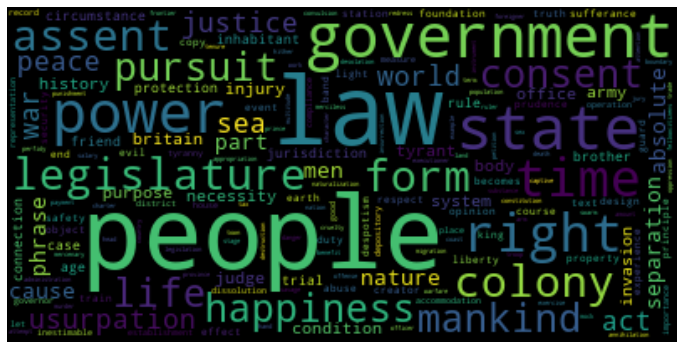

In [31]:
wordcloud = WordCloud(
    max_font_size =60,
    relative_scaling = 0.5,
).generate(noun_text) # generate가 noun_text의 string value을 입력 받아 count함.

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()